# Importing necessary things

In [1]:
import pandas as pd
import numpy as np
import sklearn

import sklearn.metrics as metrics
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, RegexpTokenizer, TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from collections import Counter

import re
from datetime import datetime

import pickle

import string

==================================================================================================================

# Retrieving lists and making Dataframes

In [2]:
# Retrieving the lists.

import bz2

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = pickle.load(data)
    return data

In [3]:
# Seeing if everything transferred properly

reviewlistglobal = decompress_pickle('compressedlistreview.pbz2')
reviewlistsea = decompress_pickle('compressedlistreview2.pbz2')

print(len(reviewlistglobal))
print(len(reviewlistsea))

6470
72164


In [4]:
dfglobal = pd.DataFrame(reviewlistglobal)
dfglobal.head()

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,appId
0,Not permitted,1,0,None,2020-12-20 10:14:08,None,com.gravity.romNAg
1,years of playing on pc and this version came o...,5,0,1.2.6,2020-12-19 06:12:56,None,com.gravity.romNAg
2,"P2W till the end, prices are way too high... A...",1,0,None,2020-12-17 05:01:06,None,com.gravity.romNAg
3,Great game a Lots fun,5,0,1.2.6,2020-12-17 01:38:27,None,com.gravity.romNAg
4,I love Eternal Love,5,0,1.2.6,2020-12-12 23:30:19,None,com.gravity.romNAg


In [5]:
dfsea = pd.DataFrame(reviewlistsea)
dfsea.head()

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,appId
0,This is a suggestion from one of the known str...,5,0,1.0.33,2020-12-20 10:36:00,None,com.gravity.romg
1,new update made several freezing screen. can't...,1,0,1.0.35,2020-12-20 10:12:36,None,com.gravity.romg
2,Very Happy,5,0,None,2020-12-20 09:40:34,None,com.gravity.romg
3,Lag delay,1,0,1.0.35,2020-12-20 07:18:42,None,com.gravity.romg
4,Laggy,2,0,1.0.35,2020-12-20 06:50:06,None,com.gravity.romg


# Changing datatypes to correct datatypes.

In [6]:
#Changing datatype to correct datatype as they are all objects.

print(dfglobal.dtypes)
print(dfsea.dtypes)

content                 object
score                   object
thumbsUpCount           object
reviewCreatedVersion    object
at                      object
replyContent            object
appId                   object
dtype: object
content                 object
score                   object
thumbsUpCount           object
reviewCreatedVersion    object
at                      object
replyContent            object
appId                   object
dtype: object


In [7]:
dfglobal['content'] = dfglobal['content'].astype('string')
dfglobal['score'] = dfglobal['score'].astype('int')
dfglobal['thumbsUpCount'] = dfglobal['thumbsUpCount'].astype('int')
dfglobal['reviewCreatedVersion'] = dfglobal['reviewCreatedVersion'].astype('string')
dfglobal['at'] = dfglobal['at'].astype('string')
dfglobal['replyContent'] = dfglobal['replyContent'].astype('string')
dfglobal['appId'] = dfglobal['appId'].astype('string')

dfsea['content'] = dfsea['content'].astype('string')
dfsea['score'] = dfsea['score'].astype('int')
dfsea['thumbsUpCount'] = dfsea['thumbsUpCount'].astype('int')
dfsea['reviewCreatedVersion'] = dfsea['reviewCreatedVersion'].astype('string')
dfsea['at'] = dfsea['at'].astype('string')
dfsea['replyContent'] = dfsea['replyContent'].astype('string')
dfsea['appId'] = dfsea['appId'].astype('string')

In [8]:
# checking for null values.

print(dfglobal.isna().sum())
print('-------------------------')
print(dfsea.isna().sum())

content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
appId                   0
dtype: int64
-------------------------
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
appId                   0
dtype: int64


==================================================================================================================

# EDA

In [9]:
# Looking at distribution of ratings in both global and sea

print(dfglobal['score'].value_counts())
print('---------------------')
print(dfsea['score'].value_counts())

5    3082
1    1767
4     649
3     565
2     407
Name: score, dtype: int64
---------------------
5    33320
1    27520
4     4865
3     3843
2     2616
Name: score, dtype: int64


In [11]:
scorecountglobal = Counter(dfglobal['score'])
scorecountsea = Counter(dfsea['score'])

print(scorecountglobal.most_common(5))
print('---------------------')
print(scorecountglobal.most_common(5))

[(5, 3082), (1, 1767), (4, 649), (3, 565), (2, 407)]
---------------------
[(5, 3082), (1, 1767), (4, 649), (3, 565), (2, 407)]


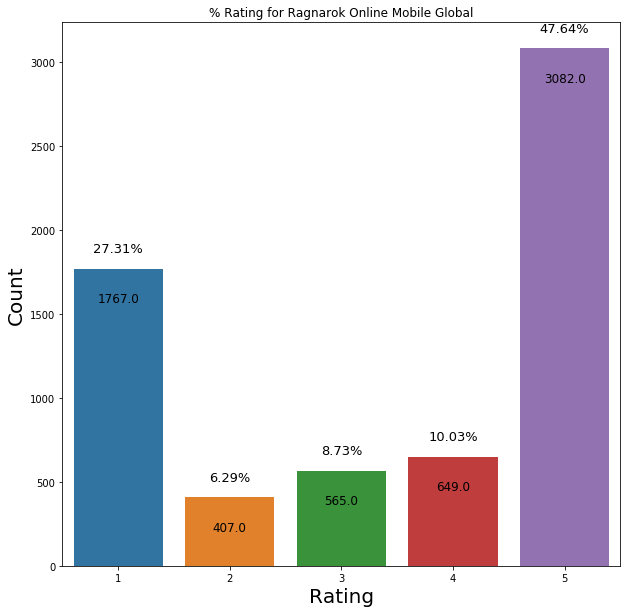

In [15]:
# Plotting distribution of ratings out of all the reviews
# Interestingly, it is very similar to overall rating distribution across all top mobile games.


xaxis = [val[0] for val in scorecountglobal.most_common(5)]
yaxis = [val[1] for val in scorecountglobal.most_common(5)]

plt.figure(figsize=(10,10))
ax = sns.barplot(xaxis, yaxis)

plt.title('% Rating for Ragnarok Online Mobile Global')
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Rating', fontsize = 20)


for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(yaxis))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')
        
for p in ax.patches:
             ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, -30),
                 textcoords='offset points')

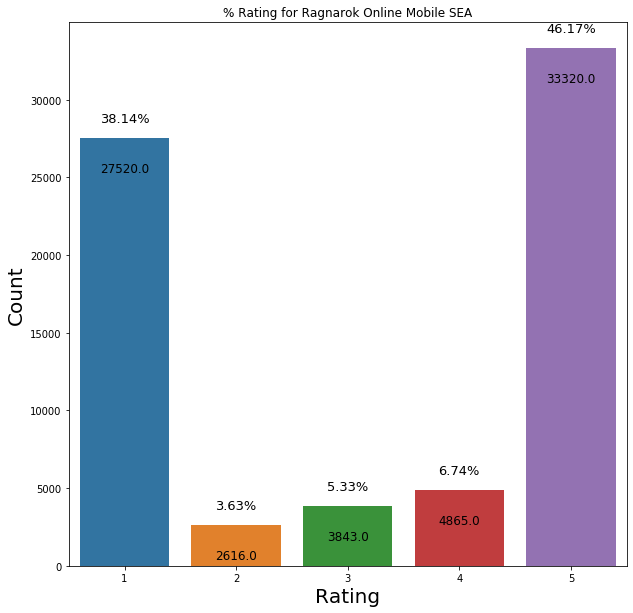

In [14]:
xaxis = [val[0] for val in scorecountsea.most_common(5)]
yaxis = [val[1] for val in scorecountsea.most_common(5)]

plt.figure(figsize=(10,10))
ax = sns.barplot(xaxis, yaxis)

plt.title('% Rating for Ragnarok Online Mobile SEA')
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Rating', fontsize = 20)


for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(yaxis))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')
        
for p in ax.patches:
             ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, -30),
                 textcoords='offset points')

In [20]:
# Interestingly despite following the same-ish timeline and being on the same page,
# the listed reviews created versions are different.

print(dfglobal['reviewCreatedVersion'].value_counts())
print('---------------------')
print(dfsea['reviewCreatedVersion'].value_counts())

1.0.1    4427
None     1177
1.0.7     216
1.1.3     147
1.0.5     147
1.1.0     133
1.2.0      74
1.2.2      60
1.2.4      51
1.2.6      38
Name: reviewCreatedVersion, dtype: Int64
---------------------
1.0.5     25375
None      13880
1.0.9     11780
1.0.8     11227
1.0.25     2393
1.0.27     2139
1.0.10     1751
1.0.33     1502
1.0.30     1004
1.0.35      656
1.0.3       455
1.0.32        2
Name: reviewCreatedVersion, dtype: Int64


### Datetime cleaning

In [23]:
dfglobal['at'] = dfglobal['at'].str[0:10]
dfsea['at'] = dfsea['at'].str[0:10]

print(dfglobal['at'].value_counts())
print('---------------------')
print(dfsea['at'].value_counts())

2019-01-09    715
2019-01-10    408
2019-01-11    264
2019-01-12    197
2019-01-08    167
             ... 
2020-06-16      1
2020-10-05      1
2019-09-15      1
2020-11-08      1
2020-07-13      1
Name: at, Length: 618, dtype: Int64
---------------------
2018-10-31    6034
2018-11-01    2683
2019-01-14    2528
2018-10-30    2195
2019-07-28    2050
              ... 
2020-10-07       9
2020-12-17       8
2020-11-18       8
2020-12-16       7
2020-09-21       6
Name: at, Length: 783, dtype: Int64


In [24]:
dfglobal['month'] = dfglobal['at'].str[5:7]
dfsea['month'] = dfsea['at'].str[5:7]

In [25]:
dfglobal['at'] = pd.to_datetime(dfglobal['at'], format='%Y-%m-%d')
dfsea['at'] = pd.to_datetime(dfsea['at'], format='%Y-%m-%d')

In [28]:
reviewglobaltimecounts = dfglobal['at'].value_counts().reset_index(name='counts')
reviewglobaltimecounts.columns = ['date', 'counts']

reviewseatimecounts = dfsea['at'].value_counts().reset_index(name='counts')
reviewseatimecounts.columns = ['date', 'counts']

print(reviewglobaltimecounts)
print('----------------------')
print(reviewseatimecounts)

          date  counts
0   2019-01-09     715
1   2019-01-10     408
2   2019-01-11     264
3   2019-01-12     197
4   2019-01-08     167
..         ...     ...
613 2019-07-17       1
614 2019-11-26       1
615 2020-02-13       1
616 2020-05-04       1
617 2020-11-30       1

[618 rows x 2 columns]
----------------------
          date  counts
0   2018-10-31    6034
1   2018-11-01    2683
2   2019-01-14    2528
3   2018-10-30    2195
4   2019-07-28    2050
..         ...     ...
778 2020-11-22       9
779 2020-11-18       8
780 2020-12-17       8
781 2020-12-16       7
782 2020-09-21       6

[783 rows x 2 columns]


In [29]:
reviewglobaltimecounts = reviewglobaltimecounts.sort_values(by='date')
reviewseatimecounts = reviewseatimecounts.sort_values(by='date')

reviewglobalmonthcount = dfglobal['month'].value_counts().reset_index(name='counts')
reviewglobalmonthcount.columns = ['month', 'counts']

reviewseamonthcount = dfsea['month'].value_counts().reset_index(name='counts')
reviewseamonthcount.columns = ['month', 'counts']

print(reviewglobalmonthcount)
print('----------------------')
print(reviewseamonthcount)

   month  counts
0     01    3293
1     02     770
2     03     629
3     04     492
4     05     268
5     06     224
6     07     164
7     09     161
8     08     157
9     10     132
10    11     115
11    12      65
----------------------
   month  counts
0     11   18645
1     10   10687
2     01   10052
3     12    7662
4     07    6648
5     08    5313
6     02    3019
7     03    2643
8     04    2178
9     09    1982
10    06    1745
11    05    1590


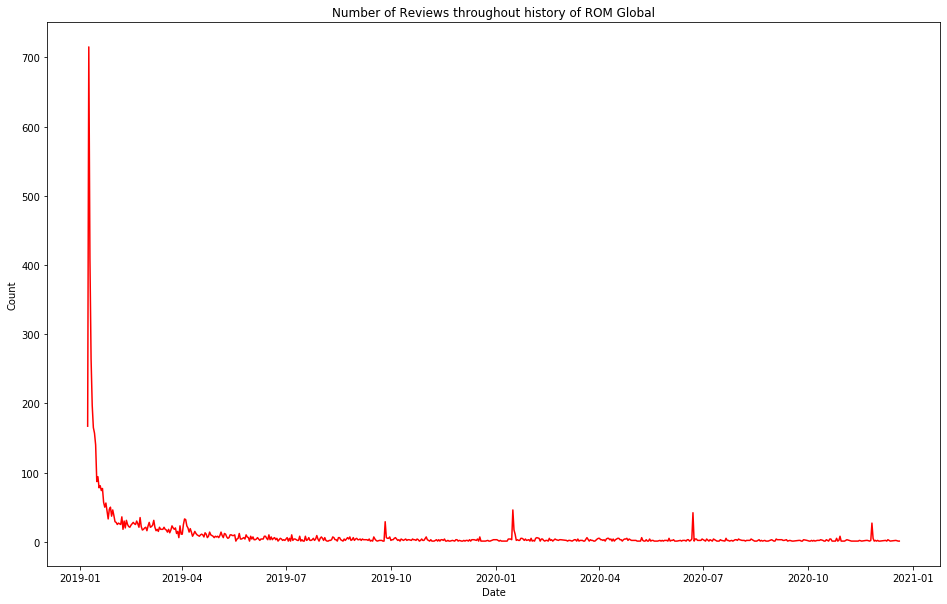

In [30]:
fig, ax = plt.subplots(figsize=(16, 10))

ax.plot(reviewglobaltimecounts['date'],
        reviewglobaltimecounts['counts'],
        color='red')

ax.set(xlabel="Date",
       ylabel="Count",
       title="Number of Reviews throughout history of ROM Global")

plt.show()

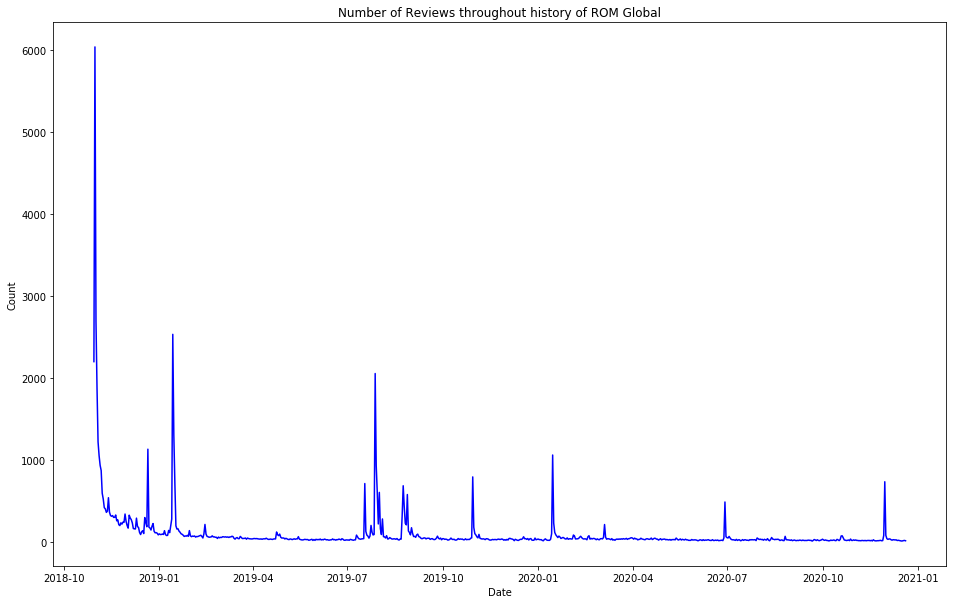

In [31]:
fig, ax = plt.subplots(figsize=(16, 10))

ax.plot(reviewseatimecounts['date'],
        reviewseatimecounts['counts'],
        color='blue')

ax.set(xlabel="Date",
       ylabel="Count",
       title="Number of Reviews throughout history of ROM Global")

plt.show()

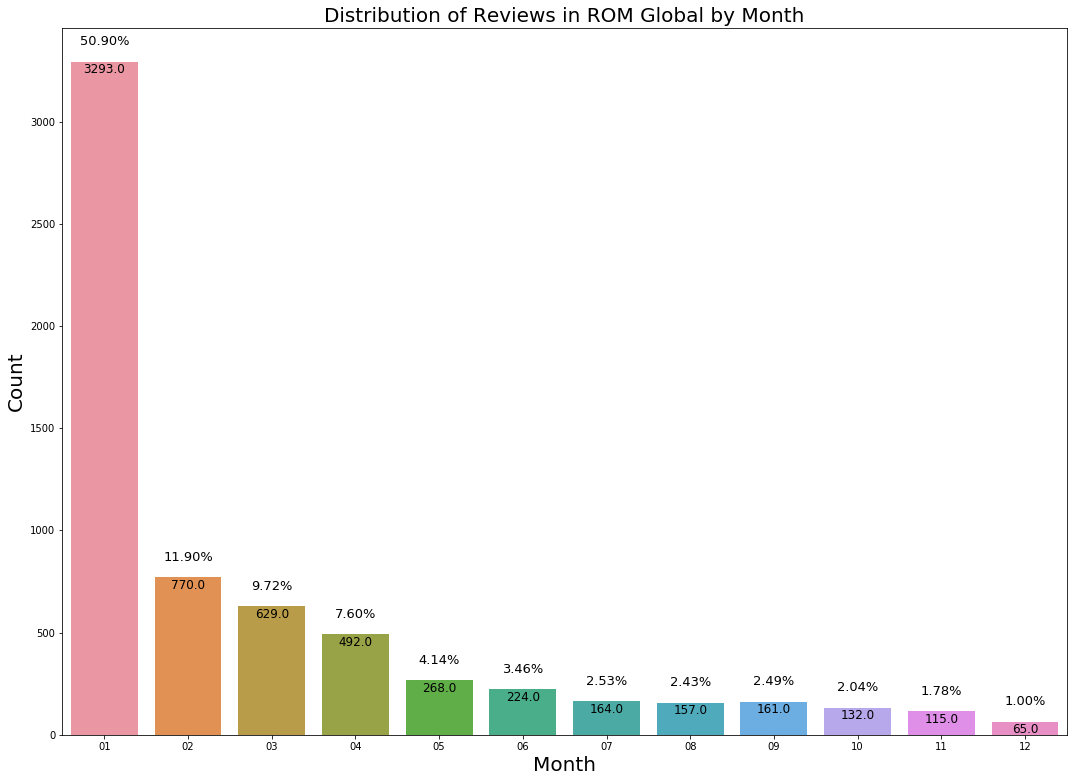

In [32]:
plt.figure(figsize=(18,13))
ax = sns.barplot(reviewglobalmonthcount['month'], reviewglobalmonthcount['counts'])

plt.title('Distribution of Reviews in ROM Global by Month', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Month', fontsize = 20)


for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(reviewglobalmonthcount['counts']))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')
        
for p in ax.patches:
             ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, -8),
                 textcoords='offset points')

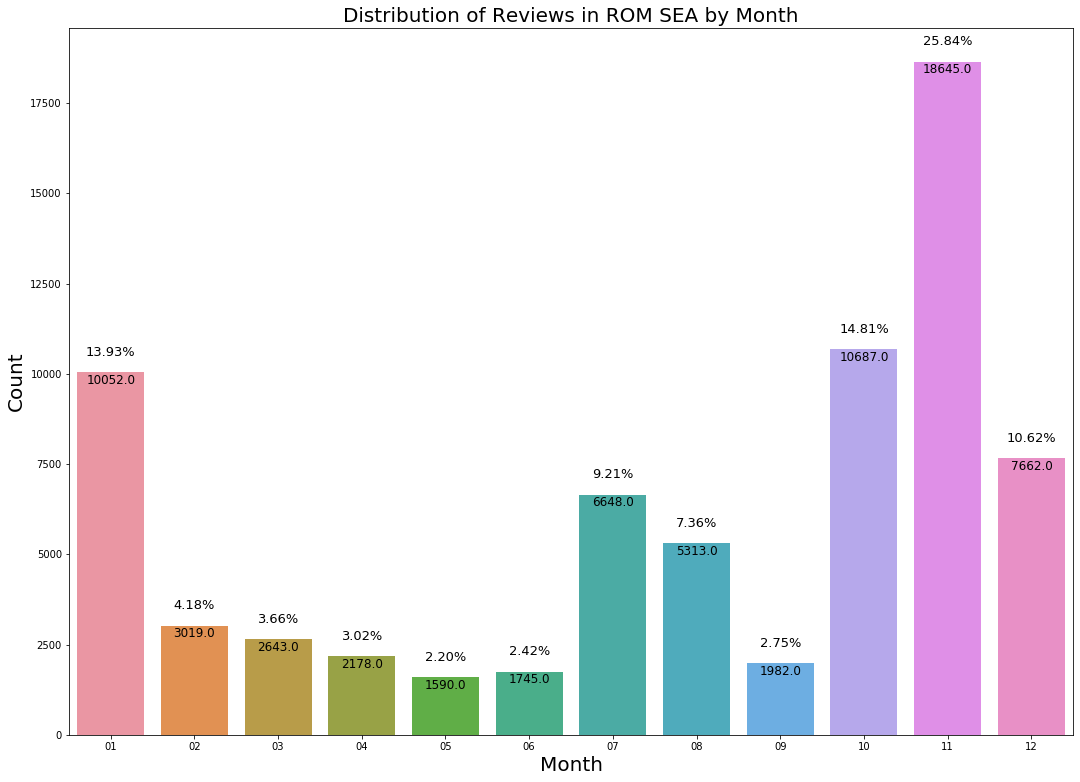

In [33]:
plt.figure(figsize=(18,13))
ax = sns.barplot(reviewseamonthcount['month'], reviewseamonthcount['counts'])

plt.title('Distribution of Reviews in ROM SEA by Month', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Month', fontsize = 20)


for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(reviewseamonthcount['counts']))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')
        
for p in ax.patches:
             ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, -8),
                 textcoords='offset points')

## Meta Features

In [38]:
print(dfglobal['content'])
print('----------------------------------------------------------')
print(dfsea['content'])

0                                           Not permitted
1       years of playing on pc and this version came o...
2       P2W till the end, prices are way too high... A...
3                                   Great game a Lots fun
4                                     I love Eternal Love
                              ...                        
6465       the best gaming experience for a mobile mmorpg
6466                                  nice game, pls dont
6467    it let me download and install but will not le...
6468    Gravity❤❤❤ R.O.Mobile version 😍😍😍! So, excitin...
6469    I love the old game can't wait to fall in love...
Name: content, Length: 6470, dtype: string
----------------------------------------------------------
0        This is a suggestion from one of the known str...
1        new update made several freezing screen. can't...
2                                               Very Happy
3                                                Lag delay
4                       

## Meta Features for ROM Global

In [39]:
dfglobal["numwords"] = dfglobal["content"].apply(lambda x: len(str(x).split()))

dfglobal["numuniquewords"] = dfglobal["content"].apply(lambda x: len(set(str(x).split())))

dfglobal["numchars"] = dfglobal["content"].apply(lambda x: len(str(x)))

dfglobal["numpuncts"] = dfglobal['content'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

dfglobal["numcapts"] = dfglobal["content"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

dfglobal["numtitles"] = dfglobal["content"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

dfglobal["meanwordlength"] = dfglobal["content"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


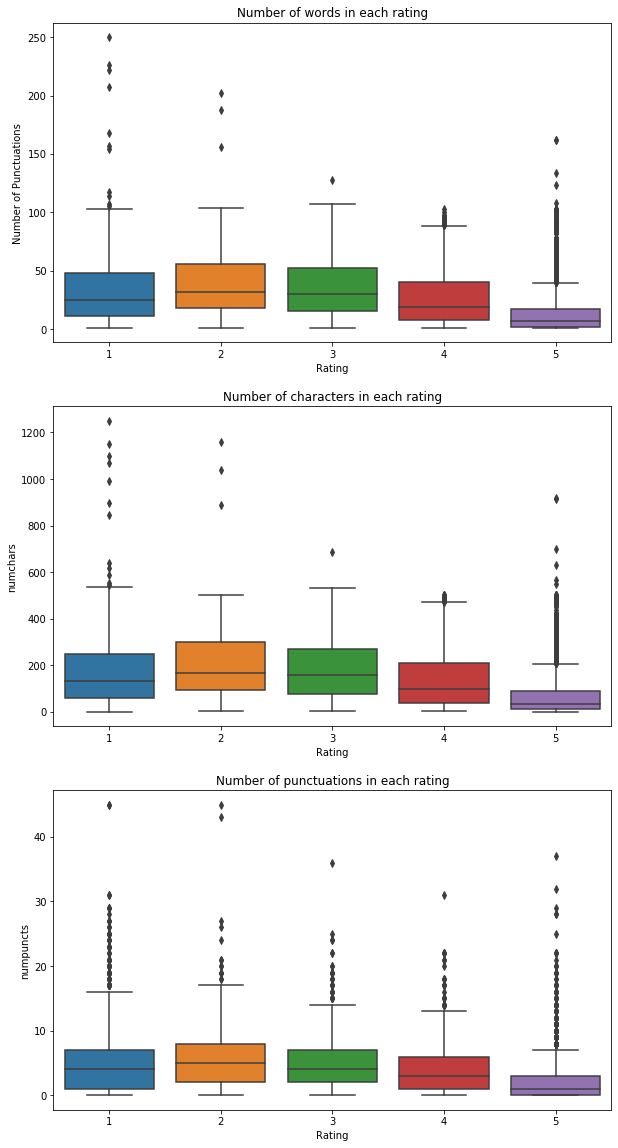

In [40]:
## Truncate some extreme values for better visuals ##
dfglobal['numwords'].loc[dfglobal['numwords']>250] = 250 
dfglobal['numchars'].loc[dfglobal['numchars']>1250] = 1250
dfglobal['numpuncts'].loc[dfglobal['numpuncts']>45] = 45

f, axes = plt.subplots(3, 1, figsize=(10,20))

sns.boxplot(x='score', y='numwords', data=dfglobal, ax=axes[0])
axes[0].set_xlabel('Rating', fontsize=10)
axes[0].set_ylabel('Number of Words', fontsize=10)
axes[0].set_title("Number of words in each rating", fontsize=12)

sns.boxplot(x='score', y='numchars', data=dfglobal, ax=axes[1])
axes[1].set_xlabel('Rating', fontsize=10)
axes[0].set_ylabel('Number of Characters', fontsize=10)
axes[1].set_title("Number of characters in each rating", fontsize=12)

sns.boxplot(x='score', y='numpuncts', data=dfglobal, ax=axes[2])
axes[2].set_xlabel('Rating', fontsize=10)
axes[0].set_ylabel('Number of Punctuations', fontsize=10)
axes[2].set_title("Number of punctuations in each rating", fontsize=12)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


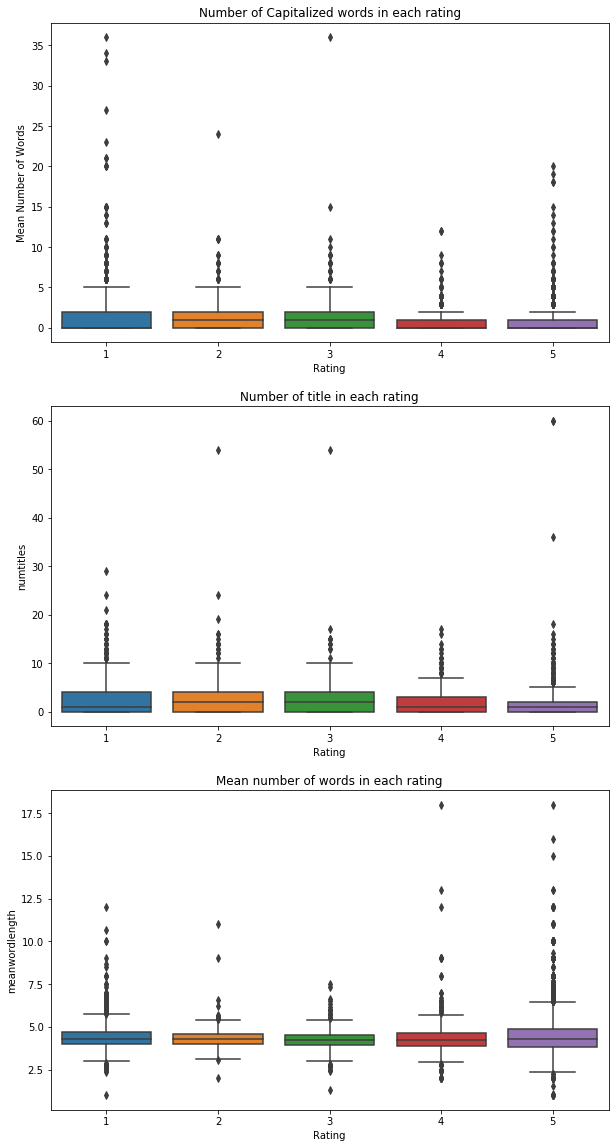

In [41]:
dfglobal['numcapts'].loc[dfglobal['numcapts']>36] = 36 
dfglobal['numtitles'].loc[dfglobal['numtitles']>60] = 60
dfglobal['meanwordlength'].loc[dfglobal['meanwordlength']>18] = 18

f, axes = plt.subplots(3, 1, figsize=(10,20))

sns.boxplot(x='score', y='numcapts', data=dfglobal, ax=axes[0])
axes[0].set_xlabel('Rating', fontsize=10)
axes[0].set_ylabel('Number of Capitalized Words', fontsize=10)
axes[0].set_title("Number of Capitalized words in each rating", fontsize=12)

sns.boxplot(x='score', y='numtitles', data=dfglobal, ax=axes[1])
axes[1].set_xlabel('Rating', fontsize=10)
axes[0].set_ylabel('Number of Title Characters', fontsize=10)
axes[1].set_title("Number of title in each rating", fontsize=12)

sns.boxplot(x='score', y='meanwordlength', data=dfglobal, ax=axes[2])
axes[2].set_xlabel('Rating', fontsize=10)
axes[0].set_ylabel('Mean Number of Words', fontsize=10)
axes[2].set_title("Mean number of words in each rating", fontsize=12)
plt.show()

## Meta Features for ROM Sea

In [42]:
dfsea["numwords"] = dfsea["content"].apply(lambda x: len(str(x).split()))

dfsea["numuniquewords"] = dfsea["content"].apply(lambda x: len(set(str(x).split())))

dfsea["numchars"] = dfsea["content"].apply(lambda x: len(str(x)))

dfsea["numpuncts"] = dfsea['content'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

dfsea["numcapts"] = dfsea["content"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

dfsea["numtitles"] = dfsea["content"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

dfsea["meanwordlength"] = dfsea["content"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


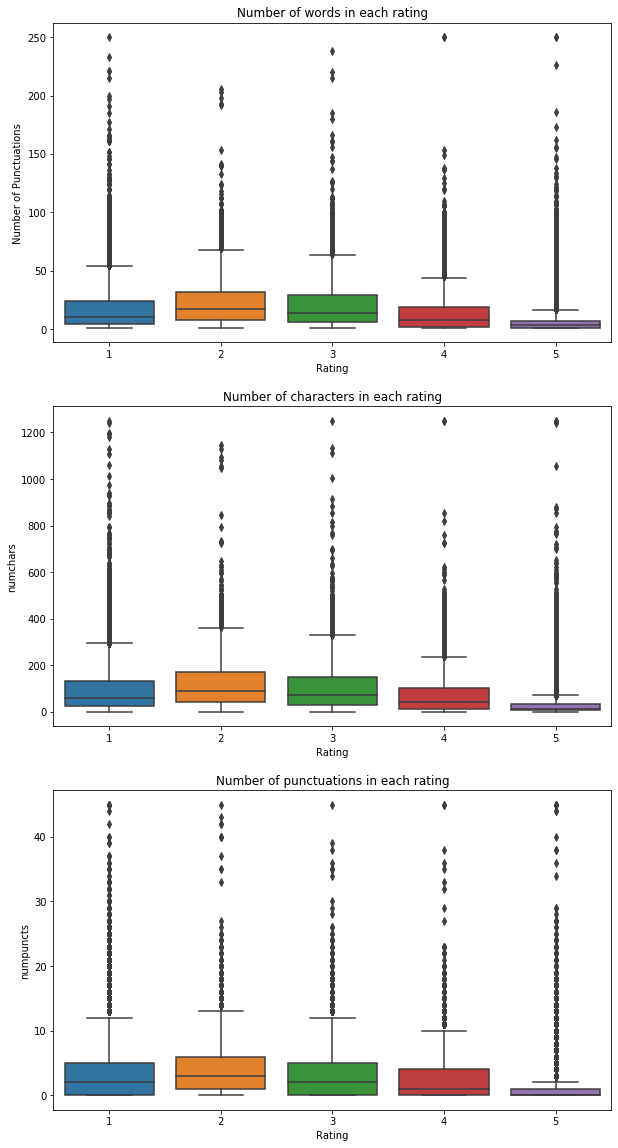

In [43]:
## Truncate some extreme values for better visuals ##
dfsea['numwords'].loc[dfsea['numwords']>250] = 250 
dfsea['numchars'].loc[dfsea['numchars']>1250] = 1250
dfsea['numpuncts'].loc[dfsea['numpuncts']>45] = 45

f, axes = plt.subplots(3, 1, figsize=(10,20))

sns.boxplot(x='score', y='numwords', data=dfsea, ax=axes[0])
axes[0].set_xlabel('Rating', fontsize=10)
axes[0].set_ylabel('Number of Words', fontsize=10)
axes[0].set_title("Number of words in each rating", fontsize=12)

sns.boxplot(x='score', y='numchars', data=dfsea, ax=axes[1])
axes[1].set_xlabel('Rating', fontsize=10)
axes[0].set_ylabel('Number of Characters', fontsize=10)
axes[1].set_title("Number of characters in each rating", fontsize=12)

sns.boxplot(x='score', y='numpuncts', data=dfsea, ax=axes[2])
axes[2].set_xlabel('Rating', fontsize=10)
axes[0].set_ylabel('Number of Punctuations', fontsize=10)
axes[2].set_title("Number of punctuations in each rating", fontsize=12)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


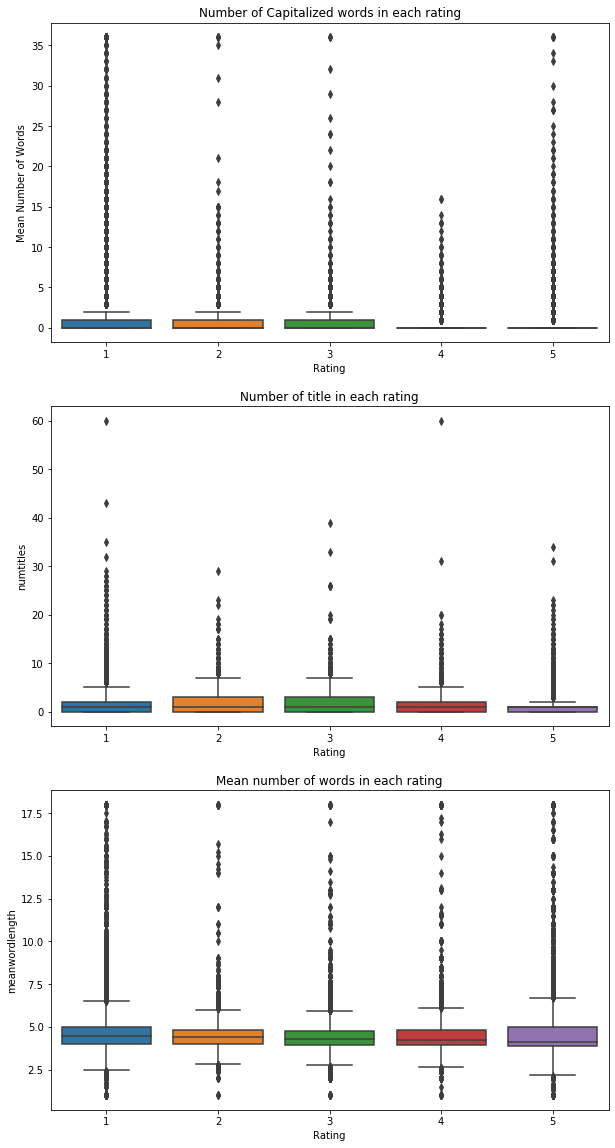

In [44]:
dfsea['numcapts'].loc[dfsea['numcapts']>36] = 36 
dfsea['numtitles'].loc[dfsea['numtitles']>60] = 60
dfsea['meanwordlength'].loc[dfsea['meanwordlength']>18] = 18

f, axes = plt.subplots(3, 1, figsize=(10,20))

sns.boxplot(x='score', y='numcapts', data=dfsea, ax=axes[0])
axes[0].set_xlabel('Rating', fontsize=10)
axes[0].set_ylabel('Number of Capitalized Words', fontsize=10)
axes[0].set_title("Number of Capitalized words in each rating", fontsize=12)

sns.boxplot(x='score', y='numtitles', data=dfsea, ax=axes[1])
axes[1].set_xlabel('Rating', fontsize=10)
axes[0].set_ylabel('Number of Title Characters', fontsize=10)
axes[1].set_title("Number of title in each rating", fontsize=12)

sns.boxplot(x='score', y='meanwordlength', data=dfsea, ax=axes[2])
axes[2].set_xlabel('Rating', fontsize=10)
axes[0].set_ylabel('Mean Number of Words', fontsize=10)
axes[2].set_title("Mean number of words in each rating", fontsize=12)
plt.show()

==================================================================================================================

# Tokenizing

In [ ]:
# Separating reviews into their scores.

rating1 = df.loc[df['score'] == 1]
rating2 = df.loc[df['score'] == 2]
rating3 = df.loc[df['score'] == 3]
rating4 = df.loc[df['score'] == 4]
rating5 = df.loc[df['score'] == 5]

In [ ]:
# Remove common words
stopwords_list = stopwords.words('english') + list(string.punctuation)
# Remove more punctuation
stopwords_list += ["''", '""', '...', '``']
# Remove random numerals
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# Remove contractions
stopwords_list += ["'d", "'ve", "ca", "n't",  "'t", "'re", "'ll", "'s"]

In [ ]:
def process_reviews(reviews):
    tokens = nltk.word_tokenize(reviews)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed   

In [ ]:
starttime = datetime.now()

rating1['wordlist'] = rating1['content'].apply(lambda x: process_reviews(x))
rating2['wordlist'] = rating2['content'].apply(lambda x: process_reviews(x))
rating3['wordlist'] = rating3['content'].apply(lambda x: process_reviews(x))
rating4['wordlist'] = rating4['content'].apply(lambda x: process_reviews(x))
rating5['wordlist'] = rating5['content'].apply(lambda x: process_reviews(x))

print(datetime.now() - starttime)

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

In [ ]:
starttime = datetime.now()

rating1['wordlistlem'] = rating1['wordlist'].apply(lemmatize_text)
rating2['wordlistlem'] = rating2['wordlist'].apply(lemmatize_text)
rating3['wordlistlem'] = rating3['wordlist'].apply(lemmatize_text)
rating4['wordlistlem'] = rating4['wordlist'].apply(lemmatize_text)
rating5['wordlistlem'] = rating5['wordlist'].apply(lemmatize_text)

print(datetime.now() - starttime)

# Saving Dataframes

In [ ]:
# Saving tokens into a sub-folder in for tidiness.

from pathlib import Path

root = Path('.')

my_path1 = root / "tokens" / "processedreviewrating1.pbz2"
my_path2 = root / "tokens" / "processedreviewrating2.pbz2"
my_path3 = root / "tokens" / "processedreviewrating3.pbz2"
my_path4 = root / "tokens" / "processedreviewrating4.pbz2"
my_path5 = root / "tokens" / "processedreviewrating5.pbz2"

import bz2

def compressed_pickle(path, data):
    with bz2.BZ2File(path, 'w') as f:
        pickle.dump(data, f)

In [ ]:
compressed_pickle(my_path1, rating1)
compressed_pickle(my_path2, rating2)
compressed_pickle(my_path3, rating3)
compressed_pickle(my_path4, rating4)
compressed_pickle(my_path5, rating5)

In [ ]:
# Retrieve our pickled dataframes

rating1 = decompress_pickle(my_path1)
rating2 = decompress_pickle(my_path2)
rating3 = decompress_pickle(my_path3)
rating4 = decompress_pickle(my_path4)
rating5 = decompress_pickle(my_path5)

# Word Frequency in all reviews

In [ ]:
starttime = datetime.now()

processedreviewrating1 = [item for elem in rating1['wordlistlem'] for item in elem]
processedreviewrating2 = [item for elem in rating2['wordlistlem'] for item in elem]
processedreviewrating3 = [item for elem in rating3['wordlistlem'] for item in elem]
processedreviewrating4 = [item for elem in rating4['wordlistlem'] for item in elem]
processedreviewrating5 = [item for elem in rating5['wordlistlem'] for item in elem]

print(datetime.now() - starttime)
print('------------')
print(len(processedreviewrating1))
print(len(processedreviewrating2))
print(len(processedreviewrating3))
print(len(processedreviewrating4))
print(len(processedreviewrating5))

In [ ]:
totalprocessedreviews = processedreviewrating1 + processedreviewrating2 + processedreviewrating3 + processedreviewrating4 + processedreviewrating5
len(totalprocessedreviews)

In [ ]:
review_freqdist = FreqDist(totalprocessedreviews)
review_freqdist.most_common(20)

In [ ]:
mostcommonwords20 = review_freqdist.most_common(20)

yaxis20 = [val[1] for val in mostcommonwords20]

xaxis20 = [val[0] for val in mostcommonwords20]

plt.figure(figsize=(18, 14))
ax = sns.barplot(xaxis20, yaxis20)
plt.title('Top 20 Most Common Words in Ragnarok Mobile Reviews', fontsize = 25)
plt.ylabel('Frequency of word', fontsize = 20)
plt.xticks(rotation=45, fontsize = 15)

for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(yaxis20))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')

# Top 20 words per Rating [Lemmatized]

In [ ]:
uselesswords = ['game', 'play', 'get', 'still', 'would']
processedreviewrating1[:] = [x for x in processedreviewrating1 if x not in uselesswords]

In [ ]:
review1_freqdist = FreqDist(processedreviewrating1)
review1_freqdist.most_common(20)

In [ ]:
mostcommonwords201 = review1_freqdist.most_common(20)

yaxis201 = [val[1] for val in mostcommonwords201]

xaxis201 = [val[0] for val in mostcommonwords201]

plt.figure(figsize=(18, 14))
ax = sns.barplot(xaxis201, yaxis201)
plt.title('Top 20 Most Common Words in Ragnarok Mobile Reviews for Rating 1', fontsize = 25)
plt.ylabel('Frequency of word', fontsize = 20)
plt.xticks(rotation=45, fontsize = 15)

for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(yaxis201))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')

In [ ]:
processedreviewrating2[:] = [x for x in processedreviewrating2 if x not in uselesswords]

In [ ]:
review2_freqdist = FreqDist(processedreviewrating2)
review2_freqdist.most_common(20)

In [ ]:
mostcommonwords202 = review2_freqdist.most_common(20)

yaxis202 = [val[1] for val in mostcommonwords202]

xaxis202 = [val[0] for val in mostcommonwords202]

plt.figure(figsize=(18, 14))
ax = sns.barplot(xaxis202, yaxis202)
plt.title('Top 20 Most Common Words in Ragnarok Mobile Reviews for Rating 2', fontsize = 25)
plt.ylabel('Frequency of word', fontsize = 20)
plt.xticks(rotation=45, fontsize = 15)

for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(yaxis202))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')

In [ ]:
processedreviewrating3[:] = [x for x in processedreviewrating3 if x not in uselesswords]

In [ ]:
review3_freqdist = FreqDist(processedreviewrating3)
review3_freqdist.most_common(20)

In [ ]:
mostcommonwords203 = review3_freqdist.most_common(20)

yaxis203 = [val[1] for val in mostcommonwords203]

xaxis203 = [val[0] for val in mostcommonwords203]

plt.figure(figsize=(18, 14))
ax = sns.barplot(xaxis203, yaxis203)
plt.title('Top 20 Most Common Words in Ragnarok Mobile Reviews for Rating 3', fontsize = 25)
plt.ylabel('Frequency of word', fontsize = 20)
plt.xticks(rotation=45, fontsize = 15)

for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(yaxis203))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')

In [ ]:
processedreviewrating4[:] = [x for x in processedreviewrating4 if x not in uselesswords]

In [ ]:
review4_freqdist = FreqDist(processedreviewrating4)
review4_freqdist.most_common(20)

In [ ]:
mostcommonwords204 = review4_freqdist.most_common(20)

yaxis204 = [val[1] for val in mostcommonwords204]

xaxis204 = [val[0] for val in mostcommonwords204]

plt.figure(figsize=(18, 14))
ax = sns.barplot(xaxis204, yaxis204)
plt.title('Top 20 Most Common Words in Ragnarok Mobile Reviews for Rating 4', fontsize = 25)
plt.ylabel('Frequency of word', fontsize = 20)
plt.xticks(rotation=45, fontsize = 15)

for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(yaxis204))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')

In [ ]:
processedreviewrating5[:] = [x for x in processedreviewrating5 if x not in uselesswords]

In [ ]:
review5_freqdist = FreqDist(processedreviewrating5)
review5_freqdist.most_common(20)

In [ ]:
mostcommonwords205 = review5_freqdist.most_common(20)

yaxis205 = [val[1] for val in mostcommonwords205]

xaxis205 = [val[0] for val in mostcommonwords205]

plt.figure(figsize=(18, 14))
ax = sns.barplot(xaxis205, yaxis205)
plt.title('Top 20 Most Common Words in Ragnarok Mobile Reviews for Rating 5', fontsize = 25)
plt.ylabel('Frequency of word', fontsize = 20)
plt.xticks(rotation=45, fontsize = 15)

for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(yaxis205))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')

# Bigrams/Trigrams overall

In [ ]:
def n_gramall(df_col, n=None):
    # Build the vectorizer, specify inputted n-gram, remove stop words
    vect = CountVectorizer(ngram_range = (n,n), stop_words = gramstopwords_list, min_df = 10)
    # fit/transform vectorizer on specified column
    vect_fit = vect.fit_transform(df_col.values.astype('U'))
    # get all words and store in a list
    word_list = vect.get_feature_names()
    # get a count of all the words
    count_list = vect_fit.toarray().sum(axis=0)
    #create a dictionary of word to count pairings
    count_dict = dict(zip(word_list, count_list))
    # sort the dictionary to show highest counted words on top
    sort_vocab = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)
    return sort_vocab

In [ ]:
gramstopwords_list = stopwords.words('english') + list(string.punctuation)
gramstopwords_list += ["''", '""', '...', '``']

In [ ]:
bigramall = n_gramall(df['content'], n=2)
bigramall[:20]

In [ ]:
mostcommonwords20bigram = bigramall[:20]

yaxis20bigram = [val[1] for val in mostcommonwords20bigram]

xaxis20biram = [val[0] for val in mostcommonwords20bigram]

plt.figure(figsize=(18, 14))
ax = sns.barplot(xaxis20biram, yaxis20bigram, palette ="rocket_r")
plt.title('Top 20 Most Bigrams in Ragnarok Mobile Reviews Overall', fontsize = 25)
plt.ylabel('Frequency of word', fontsize = 20)
plt.xticks(rotation=45, fontsize = 15, ha='right')


for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(yaxis20bigram))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')

In [ ]:
trigramall = n_gramall(df['content'], n=3)
trigramall[:20]

In [ ]:
mostcommonwords20trigram = trigramall[:20]

yaxis20trigram = [val[1] for val in mostcommonwords20trigram]

xaxis20triram = [val[0] for val in mostcommonwords20trigram]

plt.figure(figsize=(18, 14))
ax = sns.barplot(xaxis20triram, yaxis20trigram, palette ="cubehelix")
plt.title('Top 20 Most Trigrams in Mobile Game Reviews Overall', fontsize = 25)
plt.ylabel('Frequency of word', fontsize = 20)
plt.xticks(rotation=45, fontsize = 15, ha='right')

for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(yaxis20trigram))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')

# Bigrams/Trigrams for specific ratings

In [ ]:
# Rating 1

bigram1 = n_gramall(rating1['content'], n=2)
bigram1[:20]

In [ ]:
mostcommonwords201bi = bigram1[:20]

yaxis201bi = [val[1] for val in mostcommonwords201bi]

xaxis201bi = [val[0] for val in mostcommonwords201bi]

plt.figure(figsize=(18, 14))
ax = sns.barplot(xaxis201bi, yaxis201bi, palette ="vlag_r")
plt.title('Top 20 Most Common Bigrams in Ragnarok Mobile Reviews for 1 Rating', fontsize = 25)
plt.ylabel('Frequency of word', fontsize = 20)
plt.xticks(rotation=45, fontsize = 15, ha='right')


for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(yaxis201bi))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')

In [ ]:
trigram1 = n_gramall(rating1['content'], n=3)
trigram1[:20]

-------

In [ ]:
# Rating 2

bigram2 = n_gramall(rating2['content'], n=2)
bigram2[:20]

In [ ]:
# Returns nothing.

#trigram2 = n_gramall(rating2['content'], n=3)
#trigram2[:20]

--------

In [ ]:
# Rating 3

bigram3 = n_gramall(rating3['content'], n=2)
bigram3[:20]

In [ ]:
mostcommonwords203bi = bigram3[:20]

yaxis203bi = [val[1] for val in mostcommonwords203bi]

xaxis203bi = [val[0] for val in mostcommonwords203bi]

plt.figure(figsize=(18, 14))
ax = sns.barplot(xaxis203bi, yaxis203bi, palette ="Spectral")
plt.title('Top 20 Most Common Bigrams in Mobile Game Reviews for 3 Rating', fontsize = 25)
plt.ylabel('Frequency of word', fontsize = 20)
plt.xticks(rotation=45, fontsize = 15, ha='right')


for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(yaxis203bi))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')

In [ ]:
# Returns nothing.

#trigram3 = n_gramall(rating3['content'], n=3)
#trigram3[:20]

---------

In [ ]:
# Rating 4

bigram4 = n_gramall(rating4['content'], n=2)
bigram4[:20]

In [ ]:
mostcommonwords204bi = bigram4[:20]

yaxis204bi = [val[1] for val in mostcommonwords204bi]

xaxis204bi = [val[0] for val in mostcommonwords204bi]

plt.figure(figsize=(18, 14))
ax = sns.barplot(xaxis204bi, yaxis204bi, palette ="Spectral")
plt.title('Top 20 Most Common Bigrams in Mobile Game Reviews for 5 Rating', fontsize = 25)
plt.ylabel('Frequency of word', fontsize = 20)
plt.xticks(rotation=45, fontsize = 15, ha='right')


for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(yaxis205bi))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')

In [ ]:
# Returns nothing.

#trigram4 = n_gramall(rating4['content'], n=3)
#trigram4[:20]

------

In [ ]:
# Rating 5

bigram5 = n_gramall(rating5['content'], n=2)
bigram5[:20]

In [ ]:
mostcommonwords205bi = bigram5[:20]

yaxis205bi = [val[1] for val in mostcommonwords205bi]

xaxis205bi = [val[0] for val in mostcommonwords205bi]

plt.figure(figsize=(18, 14))
ax = sns.barplot(xaxis205bi, yaxis205bi, palette ="Spectral")
plt.title('Top 20 Most Common Bigrams in Mobile Game Reviews for 5 Rating', fontsize = 25)
plt.ylabel('Frequency of word', fontsize = 20)
plt.xticks(rotation=45, fontsize = 15, ha='right')


for p in ax.patches:
             ax.annotate("%.2f" % (p.get_height()*100/sum(yaxis205bi))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')

In [ ]:
trigram5 = n_gramall(rating5['content'], n=3)
trigram5[:20]